In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("./data/Auto Sales data.csv")
df.sample(4)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1602,10313,42,132.90,4,5581.80,22/10/2019,1825,Shipped,Trucks and Buses,127,S24_2300,Canadian Gift Exchange Network,(604) 555-3392,1900 Oak St.,Vancouver,V3F 2K1,Canada,Tannamuri,Yoshi,Medium
2231,10424,44,61.41,2,2702.04,31/05/2020,2232,In Process,Trucks and Buses,64,S32_3522,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
1414,10425,55,46.82,1,2575.10,31/05/2020,1415,In Process,Classic Cars,57,S24_1444,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
885,10269,32,63.08,1,2018.56,16/07/2019,1206,Shipped,Vintage Cars,62,S18_2957,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Small


In [9]:
rows, columns = df.shape
print(f"Dataset with {rows} rows and {columns} columns.")

Dataset with 2747 rows and 20 columns.


PLT

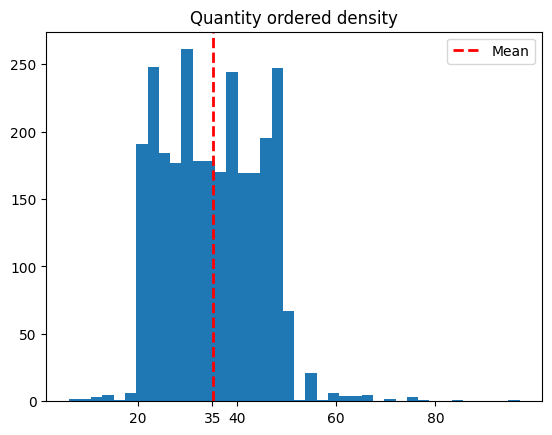

In [10]:
plt.hist(df["QUANTITYORDERED"], bins=40)
plt.title("Quantity ordered density")
plt.axvline(df["QUANTITYORDERED"].mean(), linestyle="dashed", color="red", linewidth=2, label="Mean")
plt.legend()
plt.xticks([20,40, round(df["QUANTITYORDERED"].mean(),0),60, 80])
plt.show()

SNS

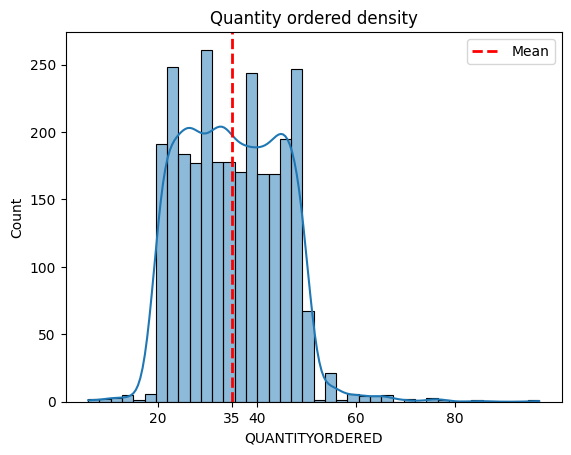

In [11]:
sns.histplot(data=df, x="QUANTITYORDERED", kde=True)
plt.title("Quantity ordered density")
plt.axvline(df["QUANTITYORDERED"].mean(), linestyle="dashed", color="red", linewidth=2, label="Mean")
plt.legend()
plt.xticks([20,40, round(df["QUANTITYORDERED"].mean(),0),60, 80])
plt.show()

In [12]:
productline_orders_count = df.groupby("PRODUCTLINE").count().reset_index()[["PRODUCTLINE", "SALES"]].rename(columns={"SALES" : "QUANTITY"})
productline_orders_sum = df.groupby("PRODUCTLINE").sum().reset_index()[["PRODUCTLINE", "SALES"]].rename(columns={"SALES" : "SUM_SALES"})
print("sum")
display(productline_orders_sum)
print("count")
display(productline_orders_count)

sum


,PRODUCTLINE,SUM_SALES
0,Classic Cars,3842868.54
1,Motorcycles,1103512.19
2,Planes,969323.42
3,Ships,700039.22
4,Trains,226243.47
5,Trucks and Buses,1111559.19
6,Vintage Cars,1806675.68


count


,PRODUCTLINE,QUANTITY
0,Classic Cars,949
1,Motorcycles,313
2,Planes,304
3,Ships,230
4,Trains,77
5,Trucks and Buses,295
6,Vintage Cars,579


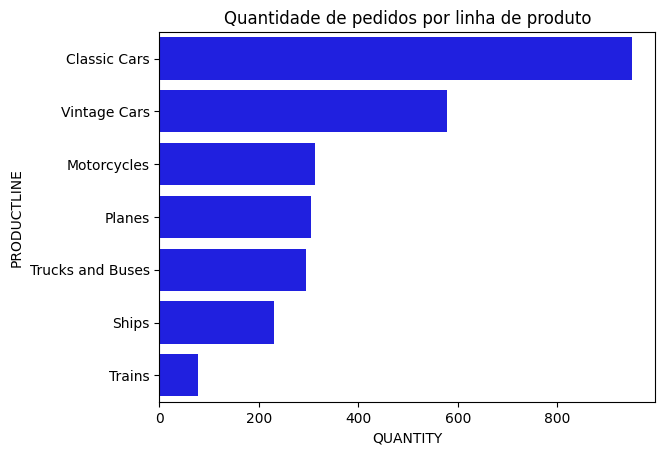

In [13]:
sns.barplot(productline_orders_count.sort_values(by="QUANTITY", ascending=False), x="QUANTITY", y="PRODUCTLINE", color="b")
plt.title("Quantidade de pedidos por linha de produto")
plt.show()

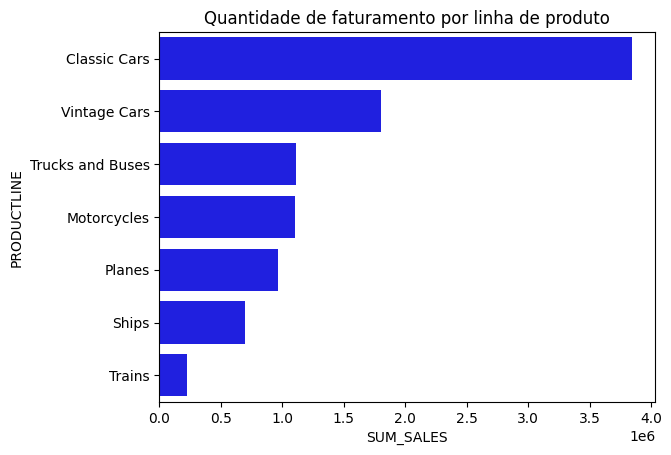

In [14]:
sns.barplot(productline_orders_sum.sort_values(by="SUM_SALES", ascending=False), x="SUM_SALES", y="PRODUCTLINE", color="b")
plt.title("Quantidade de faturamento por linha de produto")
plt.show()

In [15]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [18]:
city_sales = df.groupby(["COUNTRY", "CITY"]).sum().reset_index()[["COUNTRY", "CITY", "SALES"]].sort_values(by="SALES", ascending=False)
city_sales.head()


,COUNTRY,CITY,SALES
41,Spain,Madrid,1082551.44
69,USA,San Rafael,654858.06
60,USA,NYC,560787.77
39,Singapore,Singapore,288488.41
21,France,Paris,268944.68


In [19]:
city_sales.tail()

,COUNTRY,CITY,SALES
5,Austria,Graz,52263.90
54,USA,Brisbane,50218.51
55,USA,Burbank,46084.64
28,Germany,Munich,34993.92
8,Belgium,Charleroi,33440.10


[]

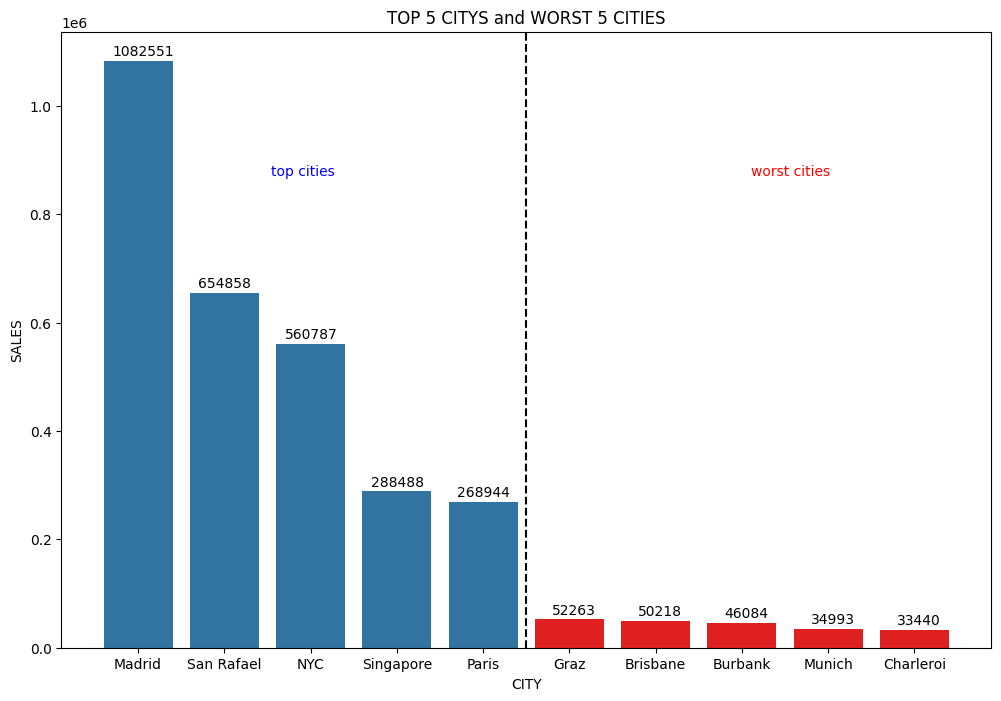

In [74]:
plt.figure(figsize=[12,8])
sns.barplot(city_sales.head(), x="CITY", y="SALES").set(title="TOP 5 CITYS and WORST 5 CITIES")
sns.barplot(city_sales.tail(), x="CITY", y="SALES", color="red")
plt.axvline(x=4.5, color="black", linestyle="dashed")
plt.figtext(0.7,0.7, "worst cities", color="red")
plt.figtext(0.3,0.7, "top cities", color="blue")
for index,data in enumerate(city_sales.head()["SALES"]):
    plt.text(x=index-0.3 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
for index,data in enumerate(city_sales.tail()["SALES"]):
    plt.text(x=index+ 4.8 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
plt.plot()

In [70]:
country_sales = df.groupby("COUNTRY").sum().reset_index()[["COUNTRY", "SALES"]].sort_values(by="SALES", ascending=False)
country_sales.head()

,COUNTRY,SALES
18,USA,3355575.69
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46


In [71]:
country_sales.tail()

,COUNTRY,SALES
10,Japan,188167.81
16,Switzerland,117713.56
2,Belgium,108412.62
12,Philippines,94015.73
8,Ireland,57756.43


[]

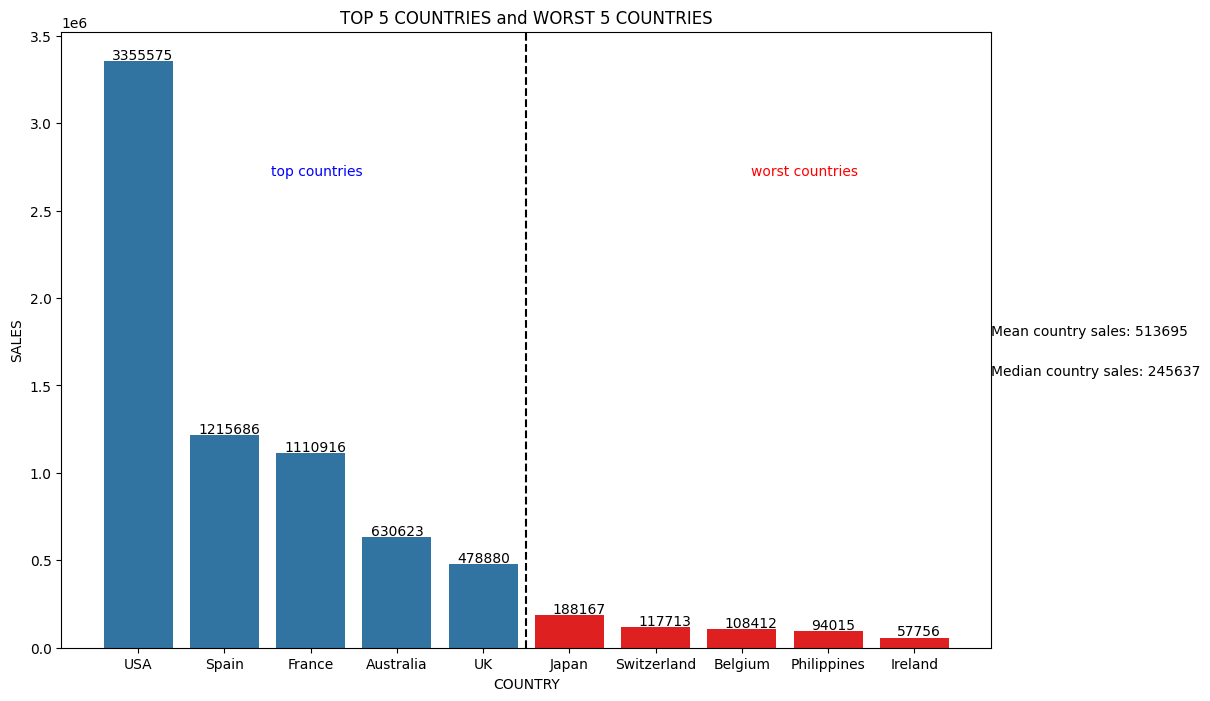

In [88]:
plt.figure(figsize=[12,8])
sns.barplot(country_sales.head(), x="COUNTRY", y="SALES").set(title="TOP 5 COUNTRIES and WORST 5 COUNTRIES")
sns.barplot(country_sales.tail(), x="COUNTRY", y="SALES", color="red")
plt.axvline(x=4.5, color="black", linestyle="dashed")
plt.figtext(0.7,0.7, "worst countries", color="red")
plt.figtext(0.3,0.7, "top countries", color="blue")
mean = int(country_sales["SALES"].mean())
median = int(country_sales["SALES"].median())
plt.figtext(0.9,0.5, f"Mean country sales: {mean}", color="black")
plt.figtext(0.9,0.45, f"Median country sales: {median}", color="black")
for index,data in enumerate(country_sales.head()["SALES"]):
    plt.text(x=index-0.3 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
for index,data in enumerate(country_sales.tail()["SALES"]):
    plt.text(x=index+ 4.8 , y=data+10000 , s=f"{int(data)}" , fontdict=dict(fontsize=10))
plt.plot()
